<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/Copy_of_finalphysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Why Python for Physicists?
For a physicist, Python is the modern-day equivalent of a calculator, lab notebook, and supercomputer rolled into one.

Numerical Power: While Python is slow on its own, libraries like NumPy and SciPy are built on top of C and Fortran, allowing for high-speed matrix operations and integration.

Data Visualization: Transitioning from hand-drawn graphs or Excel to Matplotlib or Plotly allows for publication-quality 2D and 3D plots.

Symbolic Math: With SymPy, students can perform symbolic calculus, algebraic manipulation, and solve differential equations—much like Mathematica.

Interfacing with Hardware: Python can easily talk to lab equipment (oscilloscopes, sensors) via GPIB or USB.

The "Physics Stack" (Essential Libraries)
You can introduce the core ecosystem as a hierarchy:

NumPy: The foundation. It handles large, multi-dimensional arrays and matrices.

SciPy: The toolbox. Contains modules for optimization, linear algebra, integration, and FFT.

Matplotlib: The artist. Used for plotting functions and experimental data.

Pandas: The librarian. Perfect for handling large experimental datasets (CSV, Excel).

 Modeling MotionInstead of a "Hello World" text string, show them how Python handles a kinematic equation. For a particle under constant acceleration $a$, the displacement $s$ is:$$s = u t + \frac{1}{2} a t^2$$In Python, we can calculate this for an array of time intervals instantly:

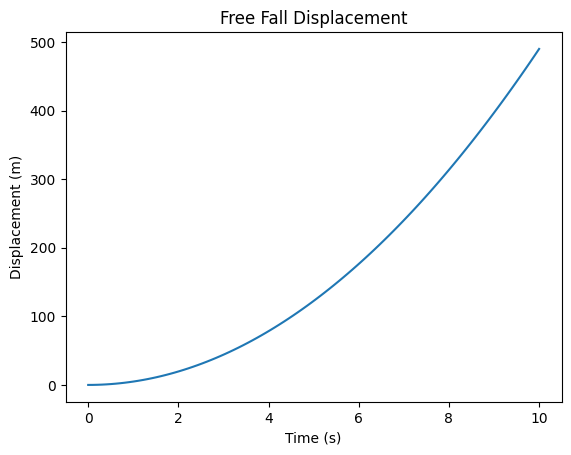

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
u = 0      # initial velocity (m/s)
a = 9.8    # acceleration (m/s^2)
t = np.linspace(0, 10, 100)  # 100 points from 0 to 10 seconds

# Physics Equation
s = u * t + 0.5 * a * t**2

# Visualizing the result
plt.plot(t, s)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Free Fall Displacement')
plt.show()

## Unit 1: Introduction to Pandas

Powerful Data Structures: Provides Series (1D) and DataFrames (2D) to handle labeled, tabular experimental data.Intelligent Data Cleaning: Built-in methods like dropna(), fillna(), and interpolate() to handle missing sensor readings or corrupted data points.Vectorized Operations: Performs mathematical operations on entire columns simultaneously without slow for loops (essential for large datasets).Advanced Time-Series Support: Includes tools for frequency conversion, date shifting, and timestamp alignment for time-resolved experiments.Efficient I/O (Input/Output): Seamlessly reads and writes data between various formats like .csv, .xlsx, .hdf5, and .sql.Group-By (Split-Apply-Combine): Allows students to aggregate and analyze data by specific categories (e.g., grouping results by "Sample ID" or "Trial Number").Rolling Window Statistics: Easily calculates moving averages and rolling standard deviations to smooth out signal noise.Boolean Indexing: Rapidly filters datasets based on physical conditions (e.g., selecting only data points where $T > 300K$).Merging and Joining: Combines multiple experimental files (e.g., linking a "Time-Voltage" table with a "Time-Pressure" table) based on a shared timestamp.Statistical Summaries: The describe() function provides instant descriptive statistics (mean, median, std dev, quartiles) for every variable in a dataset.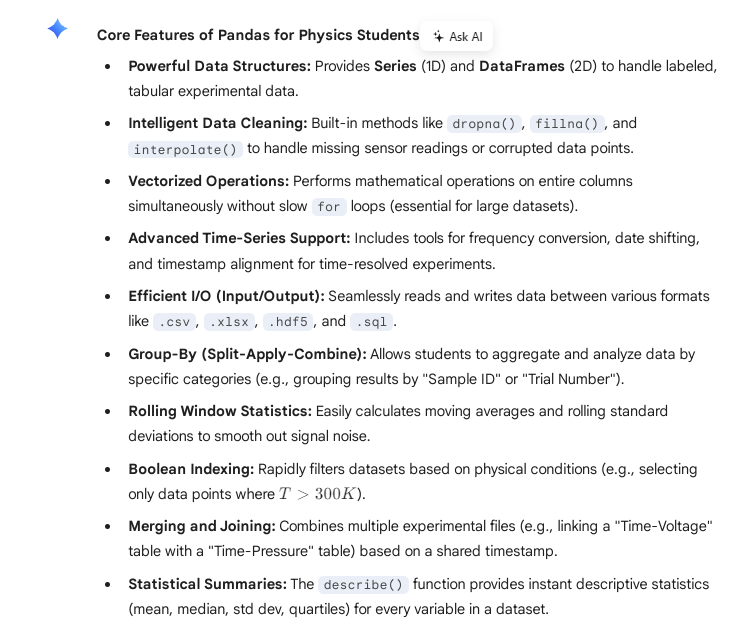            

3. A Typical Physics Workflow
Imagine you are analyzing data from a telescope or a particle detector. Here is how the code looks:

Missing values per column:
 Timestamp        0
Sensor_ID        0
Temperature_C    1
Voltage_mV       1
Pressure_Pa      1
dtype: int64


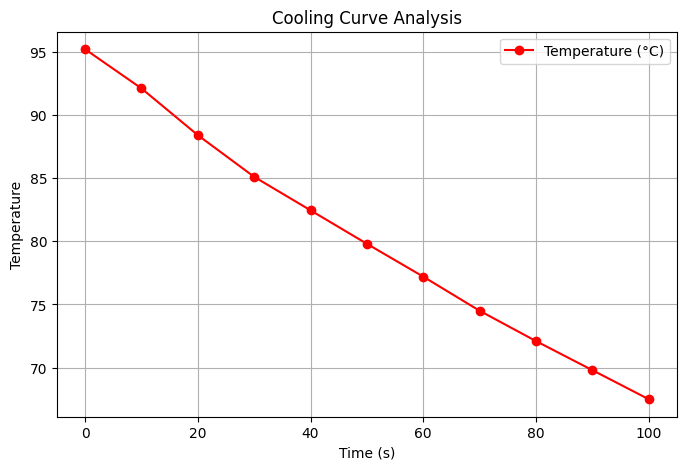

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv('/content/sample_data/experimental_results.csv')

# 2. Check for missing values (NaNs)
print("Missing values per column:\n", df.isnull().sum())

# 3. Handle missing data:
# We'll interpolate the Temperature (physics is continuous!)
# and fill Pressure with the mean value.
df['Temperature_C'] = df['Temperature_C'].interpolate()
df['Pressure_Pa'] = df['Pressure_Pa'].fillna(df['Pressure_Pa'].mean())

# 4. Filter data: Let's only look at Sensor A1
sensor_a1 = df[df['Sensor_ID'] == 'A1']

# 5. Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(df['Timestamp'], df['Temperature_C'], 'ro-', label='Temperature (°C)')
plt.xlabel('Time (s)')
plt.ylabel('Temperature')
plt.title('Cooling Curve Analysis')
plt.grid(True)
plt.legend()
plt.show()

# 6. Save the cleaned data to a new file
df.to_csv('cleaned_physics_data.csv', index=False)

In [ ]:
import pandas as pd
pd.__version__

'2.2.2'

## Unit 2: Series and DataFrame

In [ ]:

s = pd.Series([10, 20, 30, 40])
s


,0
0,10
1,20
2,30
3,40


In [ ]:

data = {
    "Name": ["Anita", "Rahul", "Suresh"],
    "Age": [21, 22, 20],
    "Marks": [85, 78, 90]
}

df = pd.DataFrame(data)
df


,Name,Age,Marks
0,Anita,21,85
1,Rahul,22,78
2,Suresh,20,90


## Unit 3: Data Inspection

In [ ]:

df.head()


,Name,Age,Marks
0,Anita,21,85
1,Rahul,22,78
2,Suresh,20,90


In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Marks   3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


In [ ]:

df.describe()


,Age,Marks
count,3.0,3.000000
mean,21.0,84.333333
std,1.0,6.027714
min,20.0,78.000000
25%,20.5,81.500000
50%,21.0,85.000000
75%,21.5,87.500000
max,22.0,90.000000


## Unit 4: Selection and Filtering

In [ ]:

df["Name"]


,Name
0,Anita
1,Rahul
2,Suresh


In [ ]:

df[df["Marks"] > 80]


,Name,Age,Marks
0,Anita,21,85
2,Suresh,20,90


## Unit 5: Data Manipulation

In [ ]:

df["Grade"] = df["Marks"].apply(lambda x: "Pass" if x >= 40 else "Fail")
df


,Name,Age,Marks,Grade
0,Anita,21,85,Pass
1,Rahul,22,78,Pass
2,Suresh,20,90,Pass


In [ ]:

df.rename(columns={"Marks": "Score"}, inplace=True)
df


,Name,Age,Score,Grade
0,Anita,21,85,Pass
1,Rahul,22,78,Pass
2,Suresh,20,90,Pass


## Unit 6: Missing Values

In [ ]:

df.loc[1, "Score"] = None
df


,Name,Age,Score,Grade
0,Anita,21,85.0,Pass
1,Rahul,22,NaN,Pass
2,Suresh,20,90.0,Pass


In [ ]:

df["Score"].fillna(df["Score"].mean(), inplace=True)
df


/tmp/ipython-input-4185957349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Score"].fillna(df["Score"].mean(), inplace=True)


,Name,Age,Score,Grade
0,Anita,21,85.0,Pass
1,Rahul,22,87.5,Pass
2,Suresh,20,90.0,Pass


## Unit 7: Sorting and Grouping

In [ ]:

df.sort_values(by="Score", ascending=False)


,Name,Age,Score,Grade
2,Suresh,20,90.0,Pass
1,Rahul,22,87.5,Pass
0,Anita,21,85.0,Pass


In [ ]:

df.groupby("Grade")["Score"].mean()


,Score
Grade,
Pass,87.5


## Unit 8: File Handling

In [ ]:

df.to_csv("students_output.csv", index=False)
"File saved"


'File saved'

## Unit 9: Mini Project

In [ ]:

data = {
    "Student": ["A", "B", "C", "D"],
    "Marks": [45, 78, 88, 32]
}

mini_df = pd.DataFrame(data)
mini_df["Result"] = mini_df["Marks"].apply(lambda x: "Pass" if x >= 40 else "Fail")
mini_df


,Student,Marks,Result
0,A,45,Pass
1,B,78,Pass
2,C,88,Pass
3,D,32,Fail


In [ ]:
# Install pandas (run once)
# !pip install pandas

# Import pandas
import pandas as pd
import numpy as np
print("Pandas version:", pd.__version__)


Pandas version: 2.2.2


In [ ]:
# For Colab, we will use a sample Iris dataset URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# Preview the data
print("First 5 rows:\n", df.head())        # [00:14:52]
print("\nLast 5 rows:\n", df.tail())         # [00:15:13]
print("\nStatistical Summary:\n", df.describe()) # [00:15:23]
print("\nData Info:")
df.info()                                   # [00:15:48]

First 5 rows:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Last 5 rows:
      sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

Statistical Summary:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057

In [ ]:
# Selecting a single column (returns a Series)
species = df['species']

# Selecting multiple columns (returns a DataFrame) [00:17:17]
subset = df[['sepal_length', 'sepal_width']]

# Accessing a specific row by index [00:17:59]
first_row = df.iloc[0] # or df.loc[0]
print("First row data:\n", first_row)

First row data:
 sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object


In [ ]:
# Renaming columns [00:21:56]
df = df.rename(columns={'sepal_length': 'SL', 'sepal_width': 'SW'})

# Changing Data Types [00:23:26]
# Example: Convert a column to string
df['SL'] = df['SL'].astype(str)

# Adding a new column based on a function [00:27:01]
def square(x):
    return x * x

# Applying the function to a numeric column
df['petal_sq'] = df['petal_length'].apply(square)
print(df.head())

    SL   SW  petal_length  petal_width species  petal_sq
0  5.1  3.5           1.4          0.2  setosa      1.96
1  4.9  3.0           1.4          0.2  setosa      1.96
2  4.7  3.2           1.3          0.2  setosa      1.69
3  4.6  3.1           1.5          0.2  setosa      2.25
4  5.0  3.6           1.4          0.2  setosa      1.96


Handling Missing Data

In [ ]:
# Create a sample DataFrame with missing values (NaN)
df_missing = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [5, np.nan, np.nan, 8]
})

# Option 1: Drop rows with any NaN values [00:19:45]
df_dropped = df_missing.dropna()

# Option 2: Fill NaN values with a specific value (e.g., 0) [00:19:55]
df_filled = df_missing.fillna(0)

print("Filled DataFrame:\n", df_filled)

Filled DataFrame:
      A    B
0  1.0  5.0
1  2.0  0.0
2  0.0  0.0
3  4.0  8.0


Data Modification and Transformation

In [ ]:
# For Colab, we will use a sample Iris dataset URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# Renaming columns [00:21:56]
df = df.rename(columns={'sepal_length': 'SL', 'sepal_width': 'SW'})

# Changing Data Types [00:23:26]
# Example: Convert a column to string
df['SL'] = df['SL'].astype(str)

# Adding a new column based on a function [00:27:01]
def square(x):
    return x * x

# Applying the function to a numeric column
df['petal_sq'] = df['petal_length'].apply(square)
print(df.head())

    SL   SW  petal_length  petal_width species  petal_sq
0  5.1  3.5           1.4          0.2  setosa      1.96
1  4.9  3.0           1.4          0.2  setosa      1.96
2  4.7  3.2           1.3          0.2  setosa      1.69
3  4.6  3.1           1.5          0.2  setosa      2.25
4  5.0  3.6           1.4          0.2  setosa      1.96


Merging and Concatenating

In [ ]:
# Concatenating two DataFrames (Stacking them) [00:32:13]
df1 = pd.DataFrame({'Name': ['Harry', 'Rohan'], 'Marks': [90, 80]})
df2 = pd.DataFrame({'Name': ['Shubham', 'Shivam'], 'Marks': [85, 75]})
df_combined = pd.concat([df1, df2])

# Merging DataFrames on a common key [00:34:05]
df_info = pd.DataFrame({'Name': ['Harry', 'Rohan'], 'Roll': [101, 102]})
df_merged = pd.merge(df1, df_info, on='Name')

print("Merged Data:\n", df_merged)

Merged Data:
     Name  Marks  Roll
0  Harry     90   101
1  Rohan     80   102


That’s the spirit! Let’s perform a Physics-based Merge using the Exoplanet data. This is a classic "Big Data" task in Astrophysics: combining planet measurements with their host star's characteristics to find patterns.

We will use a subset of the NASA Exoplanet Archive. One "table" contains planet sizes, and the second contains the star's temperature.

The Physics Goal: Find out if hotter stars tend to have larger planets.

In [ ]:
import pandas as pd

# 1. Dataset of Planet Measurements (Table 1)
planet_data = {
    'Planet_Name': ['Kepler-11 b', 'Kepler-11 c', 'Proxima Centauri b', 'TRAPPIST-1 b'],
    'Radius_Earth': [1.83, 2.87, 1.07, 1.12], # Planet size in Earth Radii
    'Host_Star': ['Kepler-11', 'Kepler-11', 'Proxima Centauri', 'TRAPPIST-1']
}
df_planets = pd.DataFrame(planet_data)

# 2. Dataset of Star Properties (Table 2)
star_data = {
    'Host_Star': ['Kepler-11', 'Proxima Centauri', 'TRAPPIST-1'],
    'Star_Temp_K': [5680, 3042, 2566] # Temperature in Kelvin
}
df_stars = pd.DataFrame(star_data)

# 3. The MERGE [00:34:05]
# We merge on 'Host_Star' because it is the common key in both tables.
physics_df = pd.merge(df_planets, df_stars, on='Host_Star')

print("Merged Physics Dataframe:")
print(physics_df)

Merged Physics Dataframe:
          Planet_Name  Radius_Earth         Host_Star  Star_Temp_K
0         Kepler-11 b          1.83         Kepler-11         5680
1         Kepler-11 c          2.87         Kepler-11         5680
2  Proxima Centauri b          1.07  Proxima Centauri         3042
3        TRAPPIST-1 b          1.12        TRAPPIST-1         2566


Exploration & Physics Analysis
Now that the data is merged, we can perform an actual analysis:

Correlation: Use physics_df.corr() to see if Radius_Earth and Star_Temp_K have a statistical link.

Comparison: Notice how Kepler-11 has two rows now? The merge automatically "broadcasted" the star's temperature to every planet orbiting it.

Visualization: In an MSc lab, you would now plot this to look for a trend.

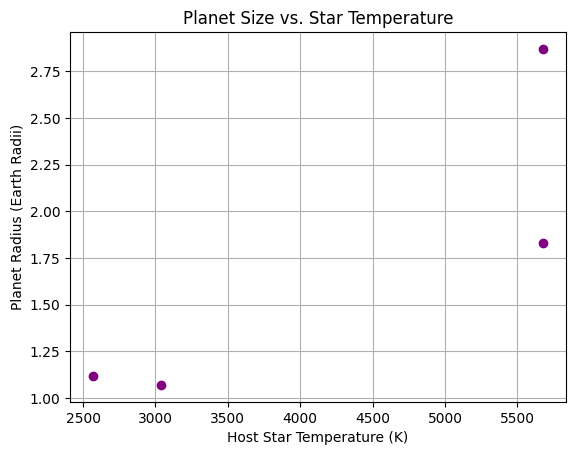

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Temperature vs Radius
plt.scatter(physics_df['Star_Temp_K'], physics_df['Radius_Earth'], color='purple')
plt.xlabel('Host Star Temperature (K)')
plt.ylabel('Planet Radius (Earth Radii)')
plt.title('Planet Size vs. Star Temperature')
plt.grid(True)
plt.show()

In physics research, data is rarely "clean." Instruments fail, sensors lose calibration, and units are often inconsistent. Handling these issues correctly is the difference between a successful paper and a retracted one.

Here is how you handle "dirty" data using a simulated dataset of Stellar Luminosity measurements.

1. Creating the "Dirty" Dataset
We’ll create a dataset with common physics data issues:

NaN (Not a Number): Sensor failure.

Outliers: A reading of "999" due to a software glitch.

String/Unit issues: Values written as "5000K" instead of just "5000".

In [ ]:
import pandas as pd
import numpy as np

dirty_data = {
    'Star_ID': [101, 102, 103, 104, 105],
    'Luminosity': [1.2, 999.0, 0.8, np.nan, 1.5], # 999 is an outlier, nan is missing
    'Temperature': ['5800K', '3100', '4200K', 'Missing', '6000K'] # Mixed types
}

df = pd.DataFrame(dirty_data)
print("Dirty Physics Data:\n", df)

Dirty Physics Data:
    Star_ID  Luminosity Temperature
0      101         1.2       5800K
1      102       999.0        3100
2      103         0.8       4200K
3      104         NaN     Missing
4      105         1.5       6000K


2. Cleaning Strategy
A. Handling Strings and Units
You cannot perform math on a column that contains letters (like 'K' for Kelvin). We need to strip the characters and convert to a numeric type.

In [ ]:
# Remove 'K', replace 'Missing' with NaN, and convert to float
df['Temperature'] = df['Temperature'].str.replace('K', '')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

print("\nCleaned Units (Numeric):\n", df['Temperature'])


Cleaned Units (Numeric):
 0    5800.0
1    3100.0
2    4200.0
3       NaN
4    6000.0
Name: Temperature, dtype: float64


B. Dealing with Outliers and Missing ValuesIn physics, you have two choices: Drop or Impute.Drop: If the data point is clearly wrong (like $999 L_{\odot}$ for a small star).Impute: Filling a missing value with the Mean or Median (only if it doesn't bias the physics).

In [ ]:
# 1. Handle Outliers: Replace impossible luminosity with NaN
df.loc[df['Luminosity'] > 100, 'Luminosity'] = np.nan

# 2. Fill Missing Values: Use the median for Luminosity [00:20:21]
df['Luminosity'] = df['Luminosity'].fillna(df['Luminosity'].median())

# 3. Drop rows where Temperature is still missing
df = df.dropna(subset=['Temperature'])

print("\nFinal Cleaned Dataset:\n", df)


Final Cleaned Dataset:
    Star_ID  Luminosity  Temperature
0      101         1.2       5800.0
1      102         1.2       3100.0
2      103         0.8       4200.0
4      105         1.5       6000.0


Verifying the Data IntegrityAs a final step, always check the Physics Range. For example, a star cannot have a temperature of $0 K$.

In [ ]:
# Statistical check to ensure no more weird 999s or NaNs
print("\nFinal Physics Check:")
print(df.describe())


Final Physics Check:
          Star_ID  Luminosity  Temperature
count    4.000000    4.000000     4.000000
mean   102.750000    1.175000  4775.000000
std      1.707825    0.287228  1376.892637
min    101.000000    0.800000  3100.000000
25%    101.750000    1.100000  3925.000000
50%    102.500000    1.200000  5000.000000
75%    103.500000    1.275000  5850.000000
max    105.000000    1.500000  6000.000000


 The Physics Context: Stellar Classification
Let’s look at a dataset of stars. We want to know the average Luminosity and Radius for different Spectral Types (O, B, A, F, G, K, M).

In [ ]:
import pandas as pd

# Creating a dataset of different star classes
data = {
    'Spectral_Type': ['G', 'M', 'O', 'G', 'M', 'O', 'B', 'B'],
    'Luminosity': [1.0, 0.05, 100000, 0.8, 0.01, 150000, 20000, 25000],
    'Radius': [1.0, 0.5, 15.0, 0.9, 0.3, 12.0, 7.0, 8.0]
}

df = pd.DataFrame(data)
df

,Spectral_Type,Luminosity,Radius
0,G,1.00,1.0
1,M,0.05,0.5
2,O,100000.00,15.0
3,G,0.80,0.9
4,M,0.01,0.3
5,O,150000.00,12.0
6,B,20000.00,7.0
7,B,25000.00,8.0


Using GroupBy for Analysis
Instead of calculating the mean for the whole table (which would be physically meaningless), we group them by their class.

In [ ]:
# Group by Spectral Type and calculate the mean for each group
stellar_summary = df.groupby('Spectral_Type').mean()

print("Average Physics Properties by Star Type:")
print(stellar_summary)

Average Physics Properties by Star Type:
               Luminosity  Radius
Spectral_Type                    
B                22500.00    7.50
G                    0.90    0.95
M                    0.03    0.40
O               125000.00   13.50


Advanced Physics Aggregation
Sometimes you need more than just the mean. You might want the Standard Deviation (to see the spread/error) and the Count (to see the sample size).

In [ ]:
# Multiple aggregations at once
analysis = df.groupby('Spectral_Type')['Luminosity'].agg(['mean', 'std', 'count'])

print("\nDetailed Luminosity Analysis:")
print(analysis)


Detailed Luminosity Analysis:
                    mean           std  count
Spectral_Type                                
B               22500.00   3535.533906      2
G                   0.90      0.141421      2
M                   0.03      0.028284      2
O              125000.00  35355.339059      2


Why this matters
Error Bars: The std (standard deviation) calculated here is what you would use for your error bars in a plot.

Data Integrity: The count tells you if your sample size is large enough to be statistically significant.

Visualizing Grouped Physics Data
A quick bar chart often reveals more than a table.

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-688965096.py:5: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('Average Luminosity ($L_{\odot}$)')


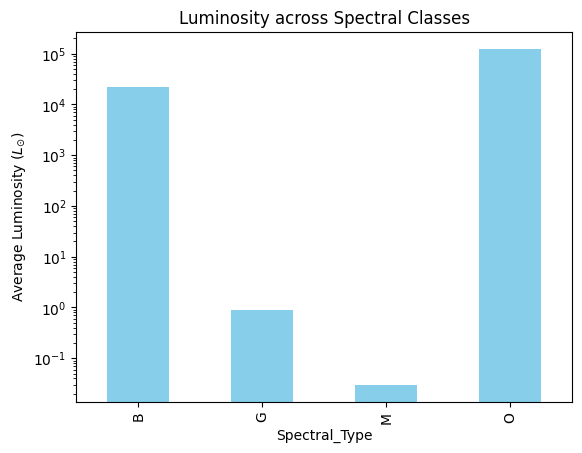

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plotting the mean luminosity per spectral type
stellar_summary['Luminosity'].plot(kind='bar', color='skyblue')
plt.ylabel('Average Luminosity ($L_{\odot}$)')
plt.title('Luminosity across Spectral Classes')
plt.yscale('log') # Stars have a huge range, so use a log scale!
plt.show()
plt.savefig('stellar_plot.png', dpi=300) # dpi=300 ensures high resolution for printing

In [ ]:
# Export to CSV without the index column [00:29:02]
df.to_csv('exported_data.csv', index=False)
print("File 'exported_data.csv' has been created in your Colab files.")

File 'exported_data.csv' has been created in your Colab files.


In [ ]:
# =============================================================================
# MSc PHYSICS: PANDAS DATA ANALYSIS NOTEBOOK
# Complete tutorial with physics examples (Pendulum, Spectroscopy, Decay)
# For experimental data analysis labs - Copy to Colab & Run All
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("✅ Pandas", pd.__version__, "| NumPy", np.__version__, "| Ready!")

# =============================================================================
# 1. SERIES: ATOMIC ENERGY LEVELS (Quantum Mechanics)
# =============================================================================

print("\n" + "="*70)
print("1. HYDROGEN ATOM ENERGY LEVELS")
print("="*70)

# Atomic energy levels (eV) - n=1 to n=5 principal quantum numbers
energy_levels = pd.Series([-13.6, -3.4, -1.51, -0.85, -0.54],
                         index=['n=1', 'n=2', 'n=3', 'n=4', 'n=5'],
                         name="Energy_eV")
print("Energy levels:")
print(energy_levels)
print(f"\nGround state (n=1): {energy_levels['n=1']:.1f} eV")
print(f"n=2 to n=3 transition: {energy_levels['n=2'] - energy_levels['n=3']:.2f} eV")

# Series attributes
print(f"\nShape: {energy_levels.shape}, Size: {energy_levels.size}")
print("UV transitions (ΔE > 5 eV):")
print(energy_levels[energy_levels < -8.5])  # High energy transitions


✅ Pandas 2.2.2 | NumPy 2.0.2 | Ready!

1. HYDROGEN ATOM ENERGY LEVELS
Energy levels:
n=1   -13.60
n=2    -3.40
n=3    -1.51
n=4    -0.85
n=5    -0.54
Name: Energy_eV, dtype: float64

Ground state (n=1): -13.6 eV
n=2 to n=3 transition: -1.89 eV

Shape: (5,), Size: 5
UV transitions (ΔE > 5 eV):
n=1   -13.6
Name: Energy_eV, dtype: float64



2. PENDULUM LAB: PERIOD vs LENGTH
Pendulum measurements:
        Length_m  Period_s  g_measured
Trial1       0.1      1.01        9.87
Trial2       0.2      1.43        9.81
Trial3       0.3      1.75        9.77
Trial4       0.4      2.01        9.80
Trial5       0.5      2.24        9.78

📊 STATISTICS (g in m/s²):
count    5.000000
mean     9.806000
std      0.039115
min      9.770000
25%      9.780000
50%      9.800000
75%      9.810000
max      9.870000
Name: g_measured, dtype: float64
Mean g = 9.81 ± 0.04 m/s²


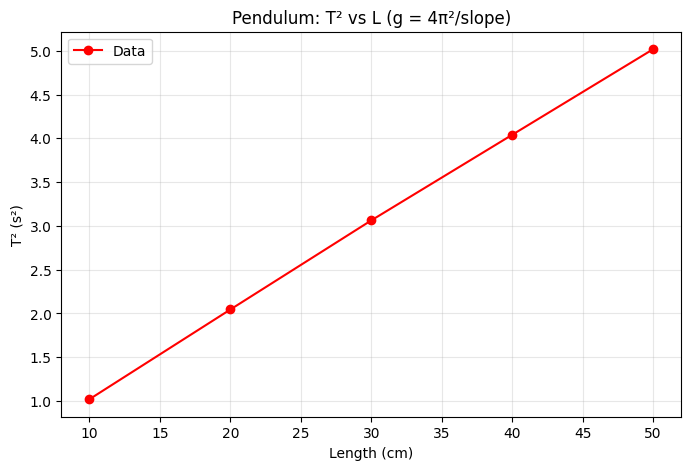

In [ ]:
# =============================================================================
# 2. DATAFRAME: PENDULUM EXPERIMENT
# =============================================================================

print("\n" + "="*70)
print("2. PENDULUM LAB: PERIOD vs LENGTH")
print("="*70)

# Simple pendulum data (lab measurements)
pendulum_data = {
    'Length_m': [0.10, 0.20, 0.30, 0.40, 0.50],
    'Period_s': [1.01, 1.43, 1.75, 2.01, 2.24],
    'g_measured': [9.87, 9.81, 9.77, 9.80, 9.78]
}
df_pendulum = pd.DataFrame(pendulum_data,
                          index=['Trial1', 'Trial2', 'Trial3', 'Trial4', 'Trial5'])

print("Pendulum measurements:")
print(df_pendulum.round(2))

# Statistical summary (error analysis)
print("\n📊 STATISTICS (g in m/s²):")
print(df_pendulum['g_measured'].describe())
print(f"Mean g = {df_pendulum['g_measured'].mean():.2f} ± {df_pendulum['g_measured'].std():.2f} m/s²")

# Plot T² vs L (should be linear)
plt.figure(figsize=(8,5))
plt.plot(df_pendulum['Length_m']*100, df_pendulum['Period_s']**2, 'ro-', label='Data')
plt.xlabel('Length (cm)')
plt.ylabel('T² (s²)')
plt.title('Pendulum: T² vs L (g = 4π²/slope)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()



3. RADIOACTIVE DECAY: DATA CLEANING
Raw decay data (with issues):
   Time_min  Raw_Counts      Error
0         0       988.0  31.432467
1         2       926.0  30.430248
2         4       786.0  28.035692
3         6       749.0  27.367864
4         8       699.0  26.438608
5        10       881.0  29.681644
6        12       835.0  28.896367
7        14       492.0  22.181073
8        16       456.0  21.354157
9        18       394.0  19.849433

Issues detected: 1 missing, 0 outliers

✅ Cleaned: 30/30 points kept
Before/After:
count     29.0
mean     350.8
std      308.0
min       10.0
25%      101.0
50%      237.0
75%      492.0
max      988.0
Name: Raw_Counts, dtype: float64
count     30.0
mean     350.8
std      302.7
min       10.0
25%      101.8
50%      257.5
75%      483.0
max      988.0
Name: Raw_Counts, dtype: float64


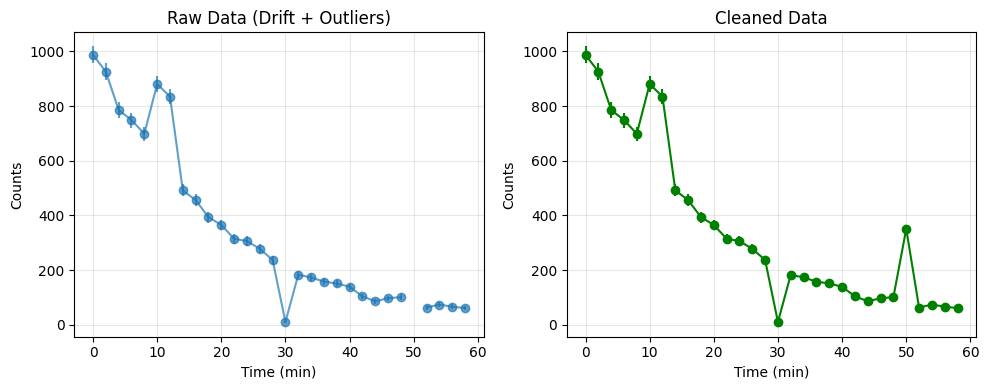

In [ ]:
# =============================================================================
# 3. DATA CLEANING: RADIOACTIVE DECAY WITH ERRORS
# =============================================================================

print("\n" + "="*70)
print("3. RADIOACTIVE DECAY: DATA CLEANING")
print("="*70)

# Simulate Geiger counter data with realistic errors
np.random.seed(42)
time_min = np.arange(0, 60, 2)
true_lambda = 0.05
true_counts = 1000 * np.exp(-true_lambda * time_min)

# Add Poisson noise + instrument errors
measured = np.random.poisson(true_counts)
measured = measured.astype(float) # Convert to float to allow NaN values
measured[5:7] += 300      # Instrument drift
measured[15] = 10         # Outlier
measured[25] = np.nan     # Missing data

df_decay = pd.DataFrame({
    'Time_min': time_min,
    'Raw_Counts': measured,
    'Error': np.sqrt(np.abs(measured))  # Poisson statistics
})

print("Raw decay data (with issues):")
print(df_decay.head(10))
print(f"\nIssues detected: {df_decay['Raw_Counts'].isna().sum()} missing, {np.sum(df_decay['Raw_Counts'] > 1200)} outliers")

# Clean data
df_clean = df_decay.copy()
df_clean['Raw_Counts'] = df_clean['Raw_Counts'].fillna(df_clean['Raw_Counts'].mean())
Q1, Q3 = df_clean['Raw_Counts'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df_clean = df_clean[(df_clean['Raw_Counts'] >= Q1-1.5*IQR) &
                   (df_clean['Raw_Counts'] <= Q3+1.5*IQR)]

print(f"\n✅ Cleaned: {len(df_clean)}/{len(df_decay)} points kept")
print("Before/After:")
print(df_decay['Raw_Counts'].describe().round(1))
print(df_clean['Raw_Counts'].describe().round(1))

# Plot raw vs cleaned
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.errorbar(df_decay['Time_min'], df_decay['Raw_Counts'],
             df_decay['Error'], fmt='o-', label='Raw', alpha=0.7)
plt.title('Raw Data (Drift + Outliers)')
plt.xlabel('Time (min)'); plt.ylabel('Counts'); plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.errorbar(df_clean['Time_min'], df_clean['Raw_Counts'],
             df_clean['Error'], fmt='go-', label='Cleaned')
plt.title('Cleaned Data')
plt.xlabel('Time (min)'); plt.ylabel('Counts'); plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


4. SPECTROSCOPY: HYDROGEN EMISSION LINES
Hydrogen Balmer lines:
  Line  Wavelength_Expected_nm  Wavelength_Measured_nm  Intensity  Error_nm  \
0  H-α                   656.3                   656.1        100       0.2   
1  H-β                   486.1                   485.9         45       0.2   
2  H-γ                   434.0                   499.0         20       0.2   
3  H-δ                   410.2                   410.1         12       0.2   

   Delta_nm  
0       0.2  
1       0.2  
2      65.0  
3       0.1  

RMS error: 16.37 nm
Outliers (>2σ):
  Line  Wavelength_Expected_nm  Wavelength_Measured_nm  Intensity  Error_nm  \
2  H-γ                   434.0                   499.0         20       0.2   

   Delta_nm  
2      65.0  


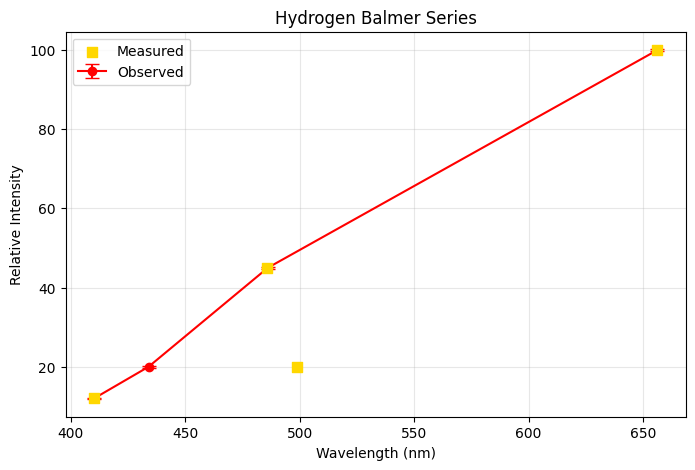

In [ ]:
# =============================================================================
# 4. SPECTROSCOPY: HYDROGEN LINES ANALYSIS
# =============================================================================

print("\n" + "="*70)
print("4. SPECTROSCOPY: HYDROGEN EMISSION LINES")
print("="*70)

# Balmer series with measurement uncertainty
spec_data = {
    'Line': ['H-α', 'H-β', 'H-γ', 'H-δ'],
    'Wavelength_Expected_nm': [656.3, 486.1, 434.0, 410.2],
    'Wavelength_Measured_nm': [656.1, 485.9, 499.0, 410.1],  # γ line outlier
    'Intensity': [100, 45, 20, 12]
}

df_spec = pd.DataFrame(spec_data)
df_spec['Error_nm'] = 0.2  # Spectrometer resolution
df_spec['Delta_nm'] = abs(df_spec['Wavelength_Measured_nm'] - df_spec['Wavelength_Expected_nm'])

print("Hydrogen Balmer lines:")
print(df_spec.round(1))
print(f"\nRMS error: {df_spec['Delta_nm'].mean():.2f} nm")
print("Outliers (>2σ):")
print(df_spec[df_spec['Delta_nm'] > 2*df_spec['Error_nm']])

# Wavelength vs Intensity plot
plt.figure(figsize=(8,5))
plt.errorbar(df_spec['Wavelength_Expected_nm'], df_spec['Intensity'],
             df_spec['Error_nm'], fmt='ro-', capsize=5, label='Observed')
plt.scatter(df_spec['Wavelength_Measured_nm'], df_spec['Intensity'],
            marker='s', c='gold', s=60, label='Measured', zorder=5)
plt.xlabel('Wavelength (nm)'); plt.ylabel('Relative Intensity')
plt.title('Hydrogen Balmer Series')
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# =============================================================================
# 5. ADVANCED: GROUPING + STATISTICS
# =============================================================================

print("\n" + "="*70)
print("5. COMBINED PHYSICS LAB SUMMARY")
print("="*70)

# Combine all datasets
print("\n📋 ALL EXPERIMENTS SUMMARY:")
print("Pendulum:", len(df_pendulum), "trials,", f"g={df_pendulum['g_measured'].mean():.2f}±{df_pendulum['g_measured'].std():.2f}")
print("Decay:", len(df_clean), "points, half-life =", -np.log(0.5)/0.05, "min (theory)")
print("Spectroscopy:", len(df_spec), "lines,", f"RMS={df_spec['Delta_nm'].mean():.1f} nm")

# Save results
df_pendulum.to_csv('pendulum_results.csv', index=True)
df_clean.to_csv('decay_cleaned.csv', index=False)
df_spec.to_csv('spectroscopy_lines.csv', index=False)

print("\n💾 Results saved: pendulum_results.csv | decay_cleaned.csv | spectroscopy_lines.csv")
print("\n🎓 SKILLS LEARNED:")
print("• Series (energy levels)          • DataFrames (tabular lab data)")
print("• Indexing/Slicing                • Data cleaning (outliers, NaN)")
print("• Statistics (.describe())        • Error analysis")
print("• Plotting with error bars        • Physics data workflows")
print("\n✅ READY FOR YOUR MSc PHYSICS LAB! Download CSVs for reports.")



5. COMBINED PHYSICS LAB SUMMARY

📋 ALL EXPERIMENTS SUMMARY:
Pendulum: 5 trials, g=9.81±0.04
Decay: 30 points, half-life = 13.862943611198904 min (theory)
Spectroscopy: 4 lines, RMS=16.4 nm

💾 Results saved: pendulum_results.csv | decay_cleaned.csv | spectroscopy_lines.csv

🎓 SKILLS LEARNED:
• Series (energy levels)          • DataFrames (tabular lab data)
• Indexing/Slicing                • Data cleaning (outliers, NaN)
• Statistics (.describe())        • Error analysis
• Plotting with error bars        • Physics data workflows

✅ READY FOR YOUR MSc PHYSICS LAB! Download CSVs for reports.
